In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

In [2]:
lf_1996 = pl.scan_csv("data/1996to2005.csv", ignore_errors=True).select("DATE", "DailyAverageDryBulbTemperature").drop_nulls()
lf_2015 = pl.scan_csv("data/2005to2015.csv", ignore_errors=True).select("DATE", "DailyAverageDryBulbTemperature").drop_nulls()
lf_2025 = pl.scan_csv("data/2015to2025.csv", ignore_errors=True).select("DATE", "DailyAverageDryBulbTemperature").drop_nulls()

In [3]:
lf_1996 = lf_1996.with_columns(
    pl.col("DailyAverageDryBulbTemperature").str.replace_all(r"[^0-9]", "").cast(pl.Int64).alias("TEMP")
)

lf_1996 = lf_1996.drop("DailyAverageDryBulbTemperature")

lf_2015 = lf_2015.rename({"DailyAverageDryBulbTemperature": "TEMP"})

lf_2025 = lf_2025.rename({"DailyAverageDryBulbTemperature": "TEMP"})

lf_full = pl.concat([lf_1996, lf_2015, lf_2025], how="vertical")

lf_full.collect()

DATE,TEMP
str,i64
"""1996-07-01T23:59:00""",83
"""1996-07-02T23:59:00""",83
"""1996-07-03T23:59:00""",82
"""1996-07-04T23:59:00""",79
"""1996-07-05T23:59:00""",80
…,…
"""2025-07-06T23:59:00""",81
"""2025-07-07T23:59:00""",80
"""2025-07-08T23:59:00""",80


In [4]:
intervals = lf_full.select("DATE").filter(pl.col("DATE").str.starts_with("1996-07-01") | pl.col("DATE").str.starts_with("2000-01-01") | pl.col("DATE").str.starts_with("2005-01-01") | pl.col("DATE").str.starts_with("2010-01-01") | pl.col("DATE").str.starts_with("2015-01-01") | pl.col("DATE").str.starts_with("2020-01-01") | pl.col("DATE").str.starts_with("2025-01-01")).collect().to_series()
intervals

DATE
str
"""1996-07-01T23:59:00"""
"""2000-01-01T23:59:00"""
"""2005-01-01T23:59:00"""
"""2010-01-01T23:59:00"""
"""2015-01-01T23:59:00"""
"""2020-01-01T23:59:00"""
"""2025-01-01T23:59:00"""


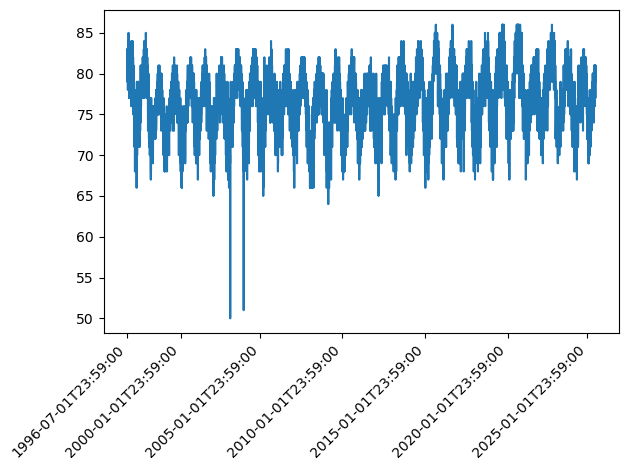

In [5]:
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TEMP").collect().to_series())
plt.xticks(intervals, rotation=45, ha="right")
plt.tight_layout()

plt.show()

In [6]:
lf_full.filter(pl.col("TEMP") <= 60).collect()

DATE,TEMP
str,i64
"""2003-03-07T23:59:00""",50
"""2004-01-02T23:59:00""",51


In [7]:
date_str = lf_full.select("DATE").collect().to_series().str.to_datetime("%Y-%m-%dT%H:%M:%S").dt

lf_full = lf_full.with_columns(
    date_str.year().alias("YEAR"),
    date_str.month().alias("MONTH"),
    date_str.day().alias("DAY"),
    date_str.hour().alias("HOUR"),
    date_str.minute().alias("MINUTE"),
    date_str.second().alias("SECOND")
    
)

lf_full.collect()


DATE,TEMP,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
str,i64,i32,i8,i8,i8,i8,i8
"""1996-07-01T23:59:00""",83,1996,7,1,23,59,0
"""1996-07-02T23:59:00""",83,1996,7,2,23,59,0
"""1996-07-03T23:59:00""",82,1996,7,3,23,59,0
"""1996-07-04T23:59:00""",79,1996,7,4,23,59,0
"""1996-07-05T23:59:00""",80,1996,7,5,23,59,0
…,…,…,…,…,…,…,…
"""2025-07-06T23:59:00""",81,2025,7,6,23,59,0
"""2025-07-07T23:59:00""",80,2025,7,7,23,59,0
"""2025-07-08T23:59:00""",80,2025,7,8,23,59,0


In [8]:

lf_full = lf_full.select(["DATE", "YEAR", "MONTH", "DAY", "HOUR", "MINUTE", "SECOND", "TEMP"])

lf_full.collect()

DATE,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,TEMP
str,i32,i8,i8,i8,i8,i8,i64
"""1996-07-01T23:59:00""",1996,7,1,23,59,0,83
"""1996-07-02T23:59:00""",1996,7,2,23,59,0,83
"""1996-07-03T23:59:00""",1996,7,3,23,59,0,82
"""1996-07-04T23:59:00""",1996,7,4,23,59,0,79
"""1996-07-05T23:59:00""",1996,7,5,23,59,0,80
…,…,…,…,…,…,…,…
"""2025-07-06T23:59:00""",2025,7,6,23,59,0,81
"""2025-07-07T23:59:00""",2025,7,7,23,59,0,80
"""2025-07-08T23:59:00""",2025,7,8,23,59,0,80


In [9]:
corr_schema = lf_full.drop("DATE").collect_schema()

for column in corr_schema.names():

    corr = lf_full.drop("DATE").select(pl.corr(column, "TEMP")).collect().item()
    print(f"{column}: {corr}") 


YEAR: 0.1259503517472589
MONTH: 0.42290630234541876
DAY: 0.017572939318755688
HOUR: nan
MINUTE: nan
SECOND: nan
TEMP: 1.0


In [10]:
lf_full = lf_full.with_columns(
    pl.when((pl.col("MONTH") >= 3) & (pl.col("MONTH") <= 5)).then(3)
    .when((pl.col("MONTH") >= 6) & (pl.col("MONTH") <= 8)).then(2)
    .when((pl.col("MONTH") >= 9) & (pl.col("MONTH") <= 11)).then(1)
    .otherwise(0).alias("SEASON")
)
lf_full = lf_full.select(["DATE", "YEAR", "SEASON", "MONTH", "DAY", "HOUR", "MINUTE", "SECOND", "TEMP"])

In [11]:
corr_schema = lf_full.drop("DATE").collect_schema()

for column in corr_schema.names():

    corr = lf_full.drop("DATE").select(pl.corr(column, "TEMP")).collect().item()
    print(f"{column}: {corr}") 

YEAR: 0.1259503517472589
SEASON: 0.21313078654837855
MONTH: 0.42290630234541876
DAY: 0.017572939318755688
HOUR: nan
MINUTE: nan
SECOND: nan
TEMP: 1.0


In [12]:
soleq_lf = pl.scan_csv("data/solsticeequinox_est.csv")
soleq_lf.collect()

YEAR,SPRING_DT,SUMMER_DT,AUTUMN_DT,WINTER_DT
i64,str,str,str,str
2017,"""2017-03-20T05:29:00""","""2017-06-20T23:24:00""","""2017-09-22T15:02:00""","""2017-12-21T11:28:00"""
2018,"""2018-03-20T11:15:00""","""2018-06-21T05:07:00""","""2018-09-22T20:54:00""","""2018-12-21T17:23:00"""
2019,"""2019-03-20T16:58:00""","""2019-06-21T10:54:00""","""2019-09-23T02:50:00""","""2019-12-21T23:19:00"""
2020,"""2020-03-19T22:50:00""","""2020-06-20T16:44:00""","""2020-09-22T08:31:00""","""2020-12-21T05:02:00"""
2021,"""2021-03-20T04:37:00""","""2021-06-20T22:32:00""","""2021-09-22T14:21:00""","""2021-12-21T10:59:00"""
2022,"""2022-03-20T10:33:00""","""2022-06-21T04:13:00""","""2022-09-22T20:03:00""","""2022-12-21T16:48:00"""
2023,"""2023-03-20T16:24:00""","""2023-06-21T09:57:00""","""2023-09-23T01:49:00""","""2023-12-21T22:27:00"""
2024,"""2024-03-19T22:06:00""","""2024-06-20T15:51:00""","""2024-09-22T07:43:00""","""2024-12-21T04:20:00"""
2025,"""2025-03-20T04:01:00""","""2025-06-20T21:42:00""","""2025-09-22T13:19:00""","""2025-12-21T10:02:00"""


In [13]:
lf_full = lf_full.join(soleq_lf, on="YEAR")
lf_full.collect()

DATE,YEAR,SEASON,MONTH,DAY,HOUR,MINUTE,SECOND,TEMP,SPRING_DT,SUMMER_DT,AUTUMN_DT,WINTER_DT
str,i32,i32,i8,i8,i8,i8,i8,i64,str,str,str,str
"""2017-01-01T23:59:00""",2017,0,1,1,23,59,0,72,"""2017-03-20T05:29:00""","""2017-06-20T23:24:00""","""2017-09-22T15:02:00""","""2017-12-21T11:28:00"""
"""2017-01-02T23:59:00""",2017,0,1,2,23,59,0,72,"""2017-03-20T05:29:00""","""2017-06-20T23:24:00""","""2017-09-22T15:02:00""","""2017-12-21T11:28:00"""
"""2017-01-03T23:59:00""",2017,0,1,3,23,59,0,70,"""2017-03-20T05:29:00""","""2017-06-20T23:24:00""","""2017-09-22T15:02:00""","""2017-12-21T11:28:00"""
"""2017-01-04T23:59:00""",2017,0,1,4,23,59,0,69,"""2017-03-20T05:29:00""","""2017-06-20T23:24:00""","""2017-09-22T15:02:00""","""2017-12-21T11:28:00"""
"""2017-01-05T23:59:00""",2017,0,1,5,23,59,0,70,"""2017-03-20T05:29:00""","""2017-06-20T23:24:00""","""2017-09-22T15:02:00""","""2017-12-21T11:28:00"""
…,…,…,…,…,…,…,…,…,…,…,…,…
"""2025-07-06T23:59:00""",2025,2,7,6,23,59,0,81,"""2025-03-20T04:01:00""","""2025-06-20T21:42:00""","""2025-09-22T13:19:00""","""2025-12-21T10:02:00"""
"""2025-07-07T23:59:00""",2025,2,7,7,23,59,0,80,"""2025-03-20T04:01:00""","""2025-06-20T21:42:00""","""2025-09-22T13:19:00""","""2025-12-21T10:02:00"""
"""2025-07-08T23:59:00""",2025,2,7,8,23,59,0,80,"""2025-03-20T04:01:00""","""2025-06-20T21:42:00""","""2025-09-22T13:19:00""","""2025-12-21T10:02:00"""


In [14]:
lf_full = lf_full.with_columns(

    pl.col("DATE").str.to_datetime("%Y-%m-%dT%H:%M:%S").alias("DATE"),
    pl.col("SPRING_DT").str.to_datetime("%Y-%m-%dT%H:%M:%S").alias("SPRING_DT"),
    pl.col("SUMMER_DT").str.to_datetime("%Y-%m-%dT%H:%M:%S").alias("SUMMER_DT"),
    pl.col("AUTUMN_DT").str.to_datetime("%Y-%m-%dT%H:%M:%S").alias("AUTUMN_DT"),
    pl.col("WINTER_DT").str.to_datetime("%Y-%m-%dT%H:%M:%S").alias("WINTER_DT")
    
)
lf_full.collect()

DATE,YEAR,SEASON,MONTH,DAY,HOUR,MINUTE,SECOND,TEMP,SPRING_DT,SUMMER_DT,AUTUMN_DT,WINTER_DT
datetime[μs],i32,i32,i8,i8,i8,i8,i8,i64,datetime[μs],datetime[μs],datetime[μs],datetime[μs]
2017-01-01 23:59:00,2017,0,1,1,23,59,0,72,2017-03-20 05:29:00,2017-06-20 23:24:00,2017-09-22 15:02:00,2017-12-21 11:28:00
2017-01-02 23:59:00,2017,0,1,2,23,59,0,72,2017-03-20 05:29:00,2017-06-20 23:24:00,2017-09-22 15:02:00,2017-12-21 11:28:00
2017-01-03 23:59:00,2017,0,1,3,23,59,0,70,2017-03-20 05:29:00,2017-06-20 23:24:00,2017-09-22 15:02:00,2017-12-21 11:28:00
2017-01-04 23:59:00,2017,0,1,4,23,59,0,69,2017-03-20 05:29:00,2017-06-20 23:24:00,2017-09-22 15:02:00,2017-12-21 11:28:00
2017-01-05 23:59:00,2017,0,1,5,23,59,0,70,2017-03-20 05:29:00,2017-06-20 23:24:00,2017-09-22 15:02:00,2017-12-21 11:28:00
…,…,…,…,…,…,…,…,…,…,…,…,…
2025-07-06 23:59:00,2025,2,7,6,23,59,0,81,2025-03-20 04:01:00,2025-06-20 21:42:00,2025-09-22 13:19:00,2025-12-21 10:02:00
2025-07-07 23:59:00,2025,2,7,7,23,59,0,80,2025-03-20 04:01:00,2025-06-20 21:42:00,2025-09-22 13:19:00,2025-12-21 10:02:00
2025-07-08 23:59:00,2025,2,7,8,23,59,0,80,2025-03-20 04:01:00,2025-06-20 21:42:00,2025-09-22 13:19:00,2025-12-21 10:02:00


In [15]:
lf_full = lf_full.with_columns(

    pl.when((pl.col("DATE") >= pl.col("SPRING_DT")) & (pl.col("DATE") <= pl.col("SUMMER_DT"))).then(3)
        .when((pl.col("DATE") >= pl.col("SUMMER_DT")) & (pl.col("DATE") <= pl.col("AUTUMN_DT"))).then(2)
        .when((pl.col("DATE") >= pl.col("AUTUMN_DT")) & (pl.col("DATE") <= pl.col("WINTER_DT"))).then(1)    
        .otherwise(0).alias("SOLSTICE_SEASON")
)

In [16]:
lf_full = lf_full.select(["YEAR", "SEASON", "SOLSTICE_SEASON", "MONTH", "DAY", "HOUR", "MINUTE", "SECOND", "TEMP"])
lf_full.collect()

YEAR,SEASON,SOLSTICE_SEASON,MONTH,DAY,HOUR,MINUTE,SECOND,TEMP
i32,i32,i32,i8,i8,i8,i8,i8,i64
2017,0,0,1,1,23,59,0,72
2017,0,0,1,2,23,59,0,72
2017,0,0,1,3,23,59,0,70
2017,0,0,1,4,23,59,0,69
2017,0,0,1,5,23,59,0,70
…,…,…,…,…,…,…,…,…
2025,2,2,7,6,23,59,0,81
2025,2,2,7,7,23,59,0,80
2025,2,2,7,8,23,59,0,80


In [17]:
corr_schema = lf_full.collect_schema()

for column in corr_schema.names():

    corr = lf_full.select(pl.corr(column, "TEMP")).collect().item()
    print(f"{column}: {corr}") 

YEAR: -0.08243845365006547
SEASON: 0.20598960899704014
SOLSTICE_SEASON: 0.4017484108520738
MONTH: 0.4672829238362643
DAY: 0.01566023823321537
HOUR: nan
MINUTE: nan
SECOND: nan
TEMP: 1.0


In [18]:
lf_full = lf_full.drop(["HOUR", "SEASON", "MINUTE", "SECOND"])

lf_full.collect()

YEAR,SOLSTICE_SEASON,MONTH,DAY,TEMP
i32,i32,i8,i8,i64
2017,0,1,1,72
2017,0,1,2,72
2017,0,1,3,70
2017,0,1,4,69
2017,0,1,5,70
…,…,…,…,…
2025,2,7,6,81
2025,2,7,7,80
2025,2,7,8,80


In [19]:
min_year = 2017
max_year = 2028

lf_full = lf_full.with_columns(

    ((pl.col("YEAR") - min_year) / (max_year - min_year)).alias("YEAR"),
    pl.when(pl.col("SOLSTICE_SEASON") == 0).then(1).otherwise(0).alias("SPRING"),
    pl.when(pl.col("SOLSTICE_SEASON") == 1).then(1).otherwise(0).alias("SUMMER"),
    pl.when(pl.col("SOLSTICE_SEASON") == 2).then(1).otherwise(0).alias("AUTUMN"),
    pl.when(pl.col("SOLSTICE_SEASON") == 3).then(1).otherwise(0).alias("WINTER"),
    np.sin(2 * np.pi * ((pl.col("MONTH") - 1) / 11)).alias("MONTH_SIN"),
    np.cos(2 * np.pi * ((pl.col("MONTH") - 1) / 11)).alias("MONTH_COS"),
    pl.col("TEMP").shift(-1).alias("TEMP_t-1"),
    pl.col("TEMP").shift(-2).alias("TEMP_t-2"),
    pl.col("TEMP").shift(-3).alias("TEMP_t-3"),
    pl.col("TEMP").shift(-4).alias("TEMP_t-4"),
    pl.col("TEMP").shift(-5).alias("TEMP_t-5"),
    pl.col("TEMP").shift(-6).alias("TEMP_t-6"),
    pl.col("TEMP").shift(-7).alias("TEMP_t-7")
    
)

lf_full = lf_full.with_columns(

    ((pl.col("TEMP_t-1") - pl.col("TEMP").min()) / (pl.col("TEMP").max() - pl.col("TEMP").min())).alias("TEMP_t-1"),
    ((pl.col("TEMP_t-2") - pl.col("TEMP").min()) / (pl.col("TEMP").max() - pl.col("TEMP").min())).alias("TEMP_t-2"),
    ((pl.col("TEMP_t-3") - pl.col("TEMP").min()) / (pl.col("TEMP").max() - pl.col("TEMP").min())).alias("TEMP_t-3"),
    ((pl.col("TEMP_t-4") - pl.col("TEMP").min()) / (pl.col("TEMP").max() - pl.col("TEMP").min())).alias("TEMP_t-4"),
    ((pl.col("TEMP_t-5") - pl.col("TEMP").min()) / (pl.col("TEMP").max() - pl.col("TEMP").min())).alias("TEMP_t-5"),
    ((pl.col("TEMP_t-6") - pl.col("TEMP").min()) / (pl.col("TEMP").max() - pl.col("TEMP").min())).alias("TEMP_t-6"),
    ((pl.col("TEMP_t-7") - pl.col("TEMP").min()) / (pl.col("TEMP").max() - pl.col("TEMP").min())).alias("TEMP_t-7"),

)

In [20]:
y = lf_full.select("TEMP")
X = lf_full.drop(["SOLSTICE_SEASON", "MONTH", "DAY", "TEMP"])

In [21]:
X.collect()

YEAR,SPRING,SUMMER,AUTUMN,WINTER,MONTH_SIN,MONTH_COS,TEMP_t-1,TEMP_t-2,TEMP_t-3,TEMP_t-4,TEMP_t-5,TEMP_t-6,TEMP_t-7
f64,i32,i32,i32,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,1,0,0,0,0.0,1.0,0.263158,0.157895,0.105263,0.157895,0.315789,0.210526,0.210526
0.0,1,0,0,0,0.0,1.0,0.157895,0.105263,0.157895,0.315789,0.210526,0.210526,0.157895
0.0,1,0,0,0,0.0,1.0,0.105263,0.157895,0.315789,0.210526,0.210526,0.157895,0.263158
0.0,1,0,0,0,0.0,1.0,0.157895,0.315789,0.210526,0.210526,0.157895,0.263158,0.368421
0.0,1,0,0,0,0.0,1.0,0.315789,0.210526,0.210526,0.157895,0.263158,0.368421,0.421053
…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.727273,0,0,1,0,-0.281733,-0.959493,0.684211,0.684211,0.684211,0.631579,null,null,null
0.727273,0,0,1,0,-0.281733,-0.959493,0.684211,0.684211,0.631579,null,null,null,null
0.727273,0,0,1,0,-0.281733,-0.959493,0.684211,0.631579,null,null,null,null,null


In [22]:
y.collect()

TEMP
i64
72
72
70
69
70
…
81
80
80
